<a href="https://www.kaggle.com/code/shravankumar147/llama-3-2-vision-models-11b-vision-instruct?scriptVersionId=199728699" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
%%capture
%pip install -U transformers accelerate

In [6]:
import torch
from transformers import MllamaForConditionalGeneration, AutoProcessor

base_model = "/kaggle/input/llama-3.2-vision/transformers/11b-vision-instruct/1"

processor = AutoProcessor.from_pretrained(base_model)

model = MllamaForConditionalGeneration.from_pretrained(
    base_model,
    low_cpu_mem_usage=True,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
import requests
from PIL import Image

url = "https://lh7-rt.googleusercontent.com/docsz/AD_4nXcz-J3iR2bEGcCSLzay07Rqfj5tTakp2EMTTN0x6nKYGLS5yWl0unoSpj2S0-mrWpDtMqjl1fAgH6pVkKJekQEY_kwzL6QNOdf143Yt66znQ0EpfLvx6CLFOqw41oeOYmhPZ6Qrlb5AjEr4AenIOgBMTWTD?key=vhLUYntaS9QOx531XpJH3g"
image = Image.open(requests.get(url, stream=True).raw)

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": "Describe the tutorial feature image."}
    ]}
]
input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(image, input_text, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=120)
print(processor.decode(output[0]))

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Describe the tutorial feature image.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The image presents a vibrant green background with a prominent logo and text, likely serving as the cover for an instructional tutorial or guide.

**Logo:**

* The logo features a stylized "o1" in large black font, accompanied by a small black strawberry icon to the right.
* A black and green knot-like symbol is positioned to the left of the "o1", adding visual interest.

**Text:**

* Below the logo, a black text box contains the phrase "Build & Deploy AI Application with o1" in bright green font.
* The text box is designed to resemble a


In [9]:
image.save("input.png")

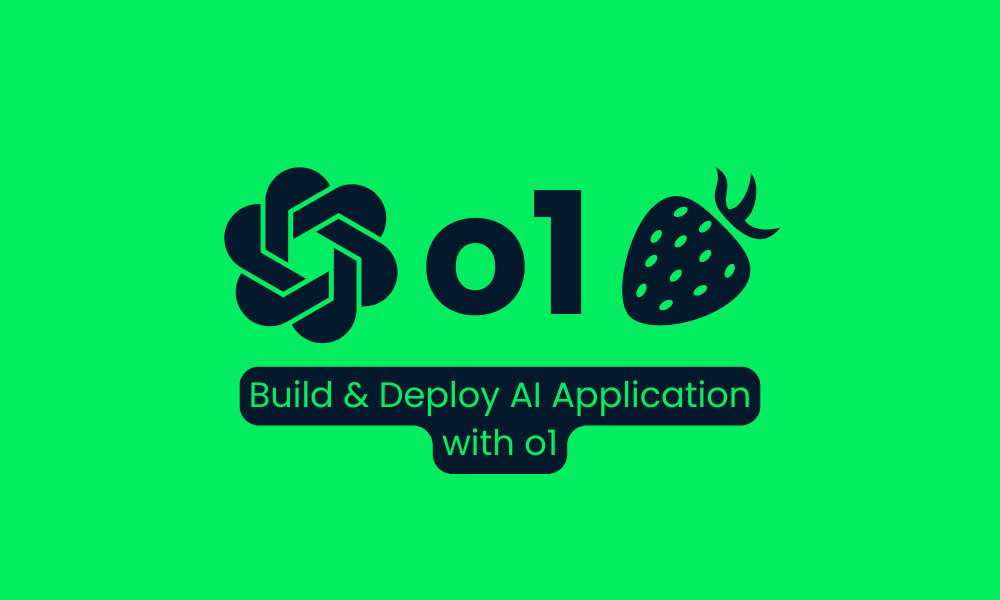

In [10]:
from IPython.display import Image
Image(filename='input.png')

The image presents a vibrant green background with a prominent logo and text, likely serving as the cover for an instructional tutorial or guide.

**Logo:**

* The logo features a stylized "o1" in large black font, accompanied by a small black strawberry icon to the right.
* A black and green knot-like symbol is positioned to the left of the "o1", adding visual interest.

**Text:**

* Below the logo, a black text box contains the phrase "Build & Deploy AI Application with o1" in bright green font.
* The text box is designed to resemble a